In [1]:
# !pip install numpy scipy matplotlib

# Obtaining List of Impact Frame Timestamps

In [2]:
import numpy as np
from scipy.io import wavfile
from scipy import signal
import matplotlib.pyplot as plt
import os 

# Change filename based on the different shot snippets you have. 
snippetfile = 'smash_snippet1.wav' 

snippet = os.path.join('data',snippetfile) 
source  = os.path.join('data','source.wav') 

# read the sample to look for
rate_snippet, snippet = wavfile.read(snippet);
snippet = np.array(snippet[:,0], dtype='float')

# read the source
rate, source = wavfile.read(source);
source = np.array(source[:,0], dtype='float')

# resample such that both signals are at the same sampling rate (if required)
if rate != rate_snippet:
    num = int(np.round(rate*len(snippet)/rate_snippet))
    snippet = signal.resample(snippet, num)

Text(0.5, 1.0, 'snippet')

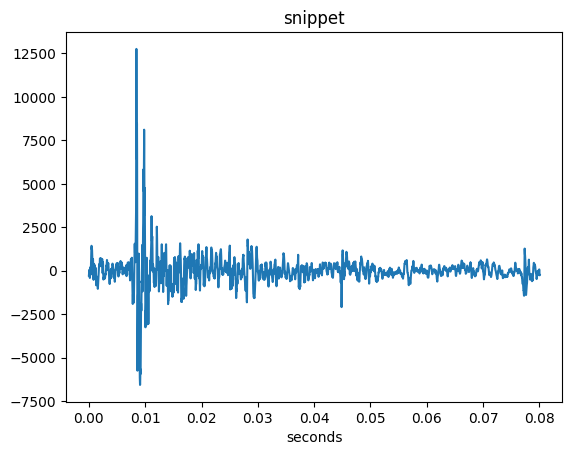

In [3]:
# Plotting the shot snippet 

x_snippet = np.arange(0, snippet.size) / rate_snippet

plt.plot(x_snippet, snippet)
plt.xlabel('seconds')
plt.title('snippet')

Text(0.5, 1.0, 'source')

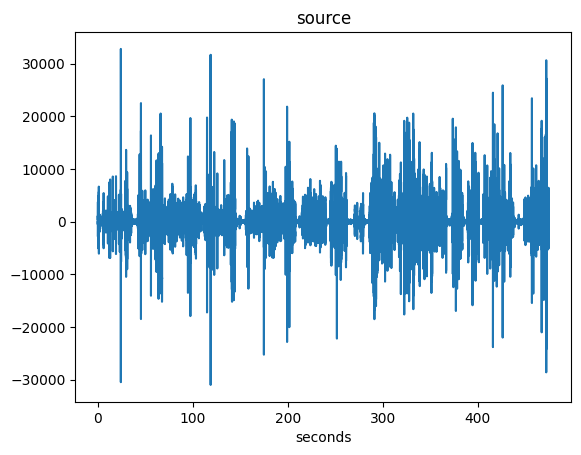

In [4]:
# Plotting the source 

x_source = np.arange(0, source.size) / rate

plt.plot(x_source, source)
plt.xlabel('seconds')
plt.title('source')

In [5]:
# %reset_selective -f "^x_source$"

In [6]:
# compute the cross-correlation
z = signal.correlate(source, snippet, mode='same')

In [7]:
source.size == z.size

True

Text(0.5, 1.0, 'correlation')

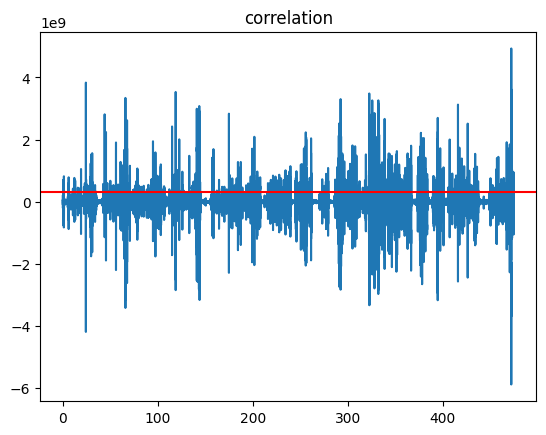

In [8]:
x_z = np.arange(0, z.size) / rate

plt.plot(x_z, z)
plt.axhline(3e8, color='r')
plt.title('correlation')

In [9]:
# height means the minimum height required of a peak 

peaks = signal.find_peaks(
    z,
    height=3e8,
    distance=7.2e4
)

In [11]:
peaks

(array([   53235,   149384,   221513,   294590,   416203,   491023,
          587548,   663902,   738992,   839117,   924981,  1003489,
         1117014,  1223938,  1318591,  1434862,  1542308,  1679756,
         1754776,  1867143,  1971682,  2044919,  2123364,  2253770,
         2328500,  2402276,  2474549,  2550612,  2626260,  2700155,
         2799326,  2923085,  3002403,  3074627,  3152957,  3246725,
         3337263,  3410239,  3509540,  3591264,  3694498,  3767358,
         3840955,  3915746,  4000782,  4080919,  4158375,  4250413,
         4323359,  4411493,  4492768,  4582220,  4655681,  4729244,
         4842958,  4947596,  5024781,  5112578,  5203450,  5280625,
         5372037,  5446492,  5541759,  5652006,  5726051,  5807164,
         5922354,  6045059,  6119066,  6240523,  6335913,  6410380,
         6536589,  6638912,  6713827,  6794745,  6897418,  6974249,
         7048397,  7131772,  7267630,  7410325,  7496191,  7624314,
         7730789,  7803926,  7897991,  7981128, 

In [10]:
peaks[0].shape

(165,)

In [11]:
peaks_idxs = peaks[0]

# plt.plot(x_z, z)
# plt.plot(x_z[peaks_idxs], z[peaks_idxs], 'or')

In [12]:
def writeTS(start): 
    with open('timestamps2.txt', 'a+') as f: 
        f.seek(0) 
        timestamps = [int(float(x)) for x in f.read().split(',') if x!='']
        if not (len(timestamps) == 0):  
            if not int(start) in timestamps: 
                f.write(',' + str(start))
                print('Added timestamp to file')
            else: 
                print('Timestamp already exists in file')
        else: 
            f.write(str(start))
            print('Added timestamp to file')
        

In [13]:
import math

for i, peak_idx in enumerate(peaks_idxs):
    start = (peak_idx-snippet.size/2) / rate 
    start = math.ceil(start * 100) / 100
    print(f"TS {i}: {start}", end = ' ')
    writeTS(start)

TS 0: 1.16 Timestamp already exists in file
TS 1: 6.16 Timestamp already exists in file
TS 2: 10.65 Timestamp already exists in file
TS 3: 12.16 Timestamp already exists in file
TS 4: 15.83 Timestamp already exists in file
TS 5: 17.38 Timestamp already exists in file
TS 6: 19.18 Timestamp already exists in file
TS 7: 22.26 Added timestamp to file
TS 8: 24.29 Timestamp already exists in file
TS 9: 27.66 Added timestamp to file
TS 10: 29.35 Timestamp already exists in file
TS 11: 30.95 Added timestamp to file
TS 12: 33.96 Timestamp already exists in file
TS 13: 42.52 Timestamp already exists in file
TS 14: 44.05 Timestamp already exists in file
TS 15: 46.87 Timestamp already exists in file
TS 16: 50.02 Timestamp already exists in file
TS 17: 51.54 Timestamp already exists in file
TS 18: 53.33 Timestamp already exists in file
TS 19: 55.99 Timestamp already exists in file
TS 20: 58.22 Timestamp already exists in file
TS 21: 60.8 Timestamp already exists in file
TS 22: 63.96 Timestamp alrea

# Visualizing Hit Frames 

In [1]:
import cv2
import os

VFILENAME = os.path.join('data', 'match2.mp4')
HEIGHT = 720
WIDTH = 1280

In [2]:
def get_frames(filename): 
    video = cv2.VideoCapture(filename) 
    frame_id = -1 
    while video.isOpened(): 
        ret, frame = video.read() 
        frame_id += 1 
        if ret: 
            yield frame, frame_id 
        else: 
            break 
    video.release() 
    yield None 

In [3]:
frames_hit = [] 
PATH_TIMESTAMPS = os.path.join('timestamps2.txt') 
with open(PATH_TIMESTAMPS,'r') as f: 
    timestamps = f.read().split(',') 
    for i,second in enumerate(timestamps):
        frame_id = int(30.0*float(second))
        frames_hit.append(frame_id)  

In [4]:
len(frames_hit) 

276

In [4]:
font = cv2.FONT_HERSHEY_PLAIN  

for frame, frame_id in get_frames(VFILENAME):
    if frame is None: break 
        
    if frame_id in frames_hit: 
        cv2.putText(frame, 'HIT POINT', (0, HEIGHT-20), font,2,(255,255,255), 2) 
        
    else: 
        cv2.putText(frame, 'NON-HIT POINT', (0, HEIGHT-20), font,2,(255,255,255), 2)  
        
    cv2.imshow('frame',frame) 
    
    # 27 is the escape key. The number in the function is waiting time
    if cv2.waitKey(30) == 27:
        if cv2.waitKey(0) == 27:
            break  
            
cv2.destroyAllWindows() 